In [142]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-phone-pricing-dataset/Mobile Phone Pricing.csv


# ✅ **Table of Contents**
--------
✅ **Import libraries.**   
✅ **Data Import & EDA.**     
✅ **Data Visualization.**   
✅ **ML Modeling and Prediction.**   

# **1. Import Libraries.**

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **2. Data Import & EDA**

In [144]:
df = pd.read_csv('/kaggle/input/mobile-phone-pricing-dataset/Mobile Phone Pricing.csv')

## **Data Description**

### Description of columns:
* battery_power: Battery Capacity in mAh.
*  blue: Has Bluetooth or not.
* clock_speed: Processor speed.
* dual_sim: Has dual sim support or not.
* fc: Front camera megapixels.
* four_g: Has 4G or not.
* int_memory: Internal Memory in GB.
* m_deep: Mobile depth in cm.
* mobile_wt: Weight in gm.
* n_cores: Processor Core Count.
* pc: Primary Camera megapixels.
* px_height: Pixel Resolution height.
* px_width: Pixel Resolution width.
* ram: Ram in MB.
* sc_h: Mobile Screen height in cm.
* sc_w: Mobile Screen width in cm
* talk_time: Time a single battery charge will last. In hours.
* three_g: Has 3G or not.
* touch_screen: Has touch screen or not.
* wifi: Has WiFi or not
* Price_range: This is the target
> + 0=low cost   
> + 1=medium cost   
> + 2=high cost   
> + 3=very high cost   

# **Summary**

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [146]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


## **Missing Value & Duplicate Value Check**

In [147]:
pd.DataFrame(df.isna().sum().reset_index(name = 'NA'))

,index,NA
0,battery_power,0
1,blue,0
2,clock_speed,0
3,dual_sim,0
4,fc,0
5,four_g,0
6,int_memory,0
7,m_dep,0
8,mobile_wt,0
9,n_cores,0


In [148]:
df.duplicated().sum()

0

In [149]:
df.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


# **2. Data Visualization**

## **Histogram**

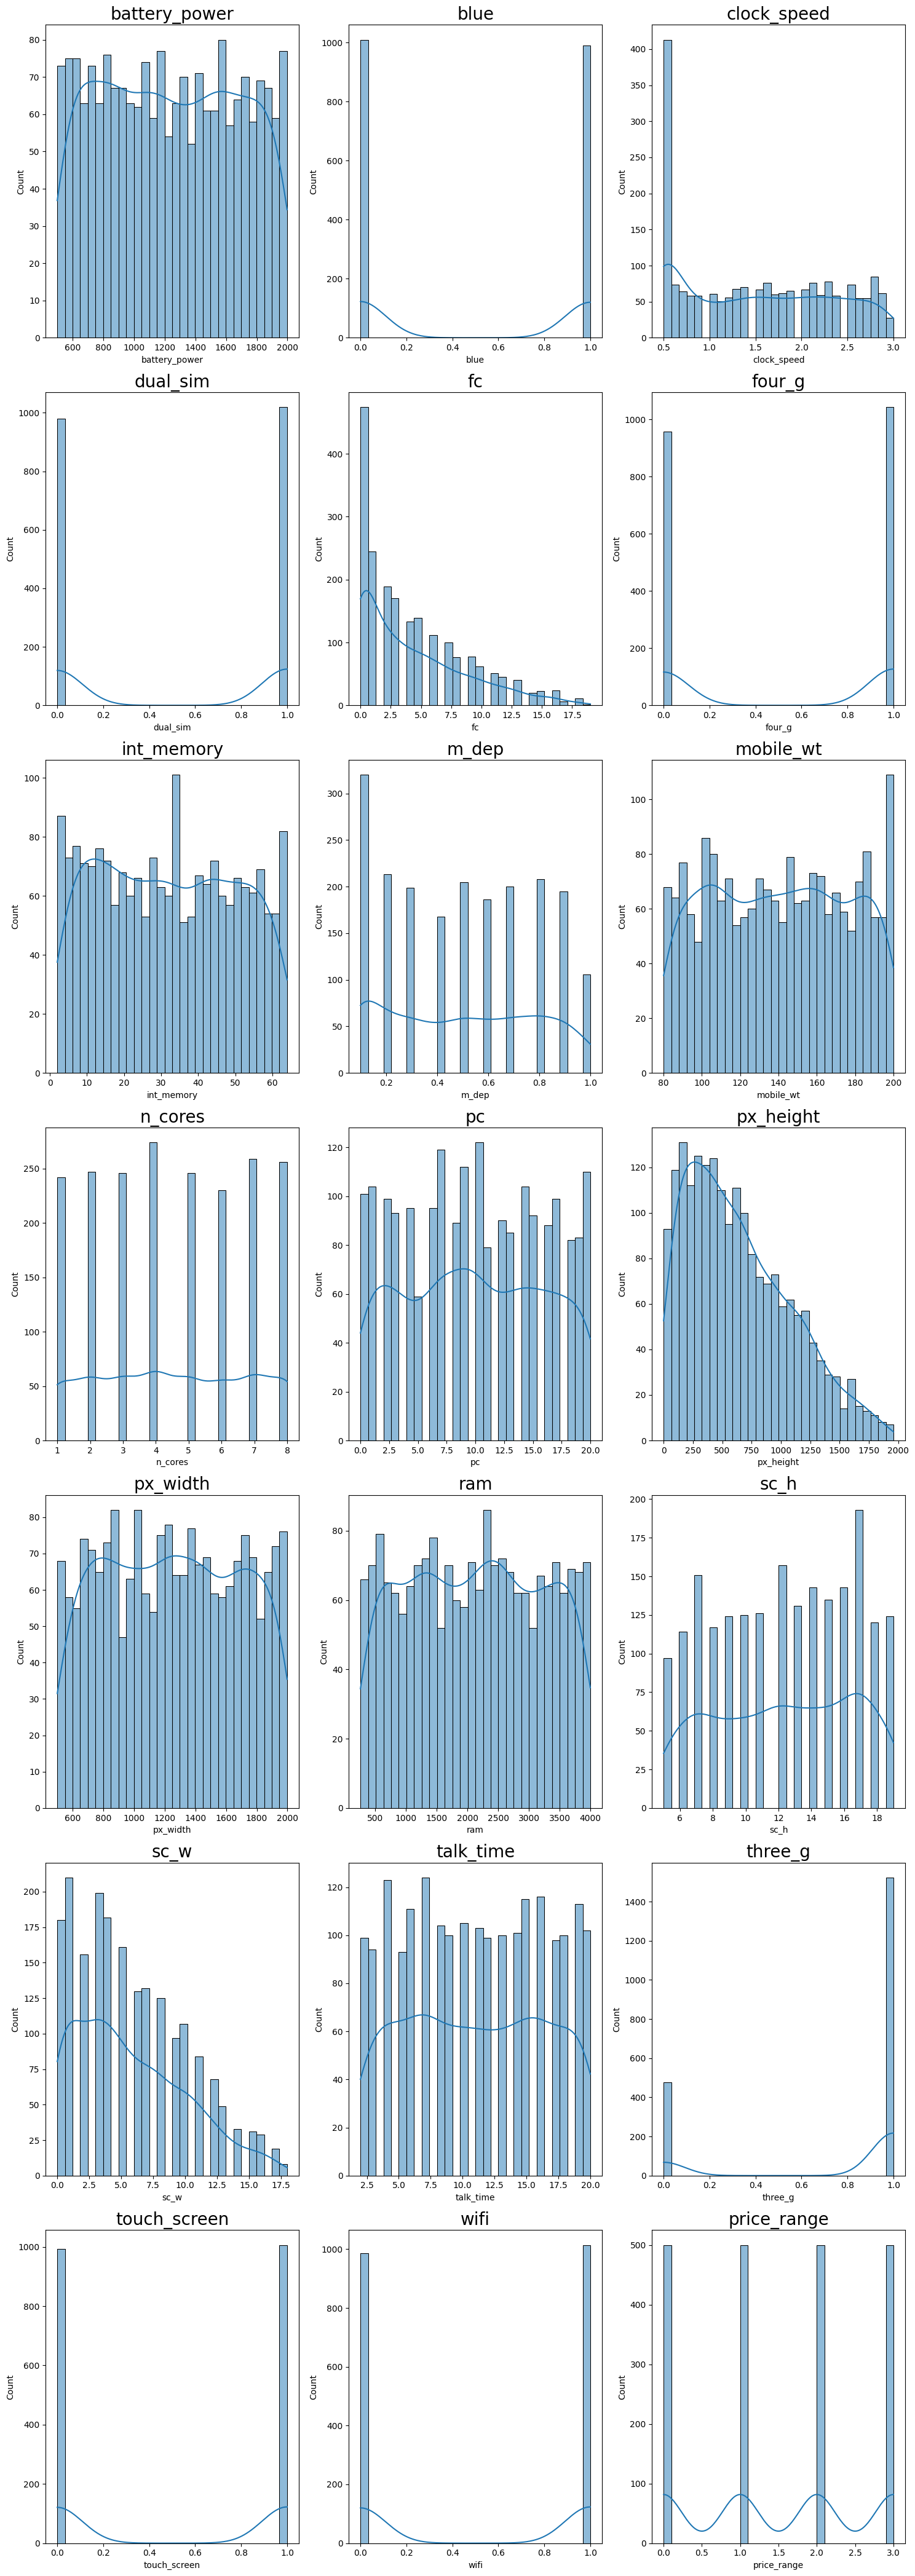

In [150]:
num_rows = (len(df.columns) + 1) // 2

f, ax = plt.subplots(7,3, figsize=(15,2 * len(df.columns)))
ax = ax.flatten()

for index, cols in enumerate(df.columns):
    sns.histplot(data = df, x= cols, ax = ax[index],kde=True, bins=30)
    ax[index].set_title(cols, size = 20)
    
plt.tight_layout()
plt.show()

## **Boxplot**

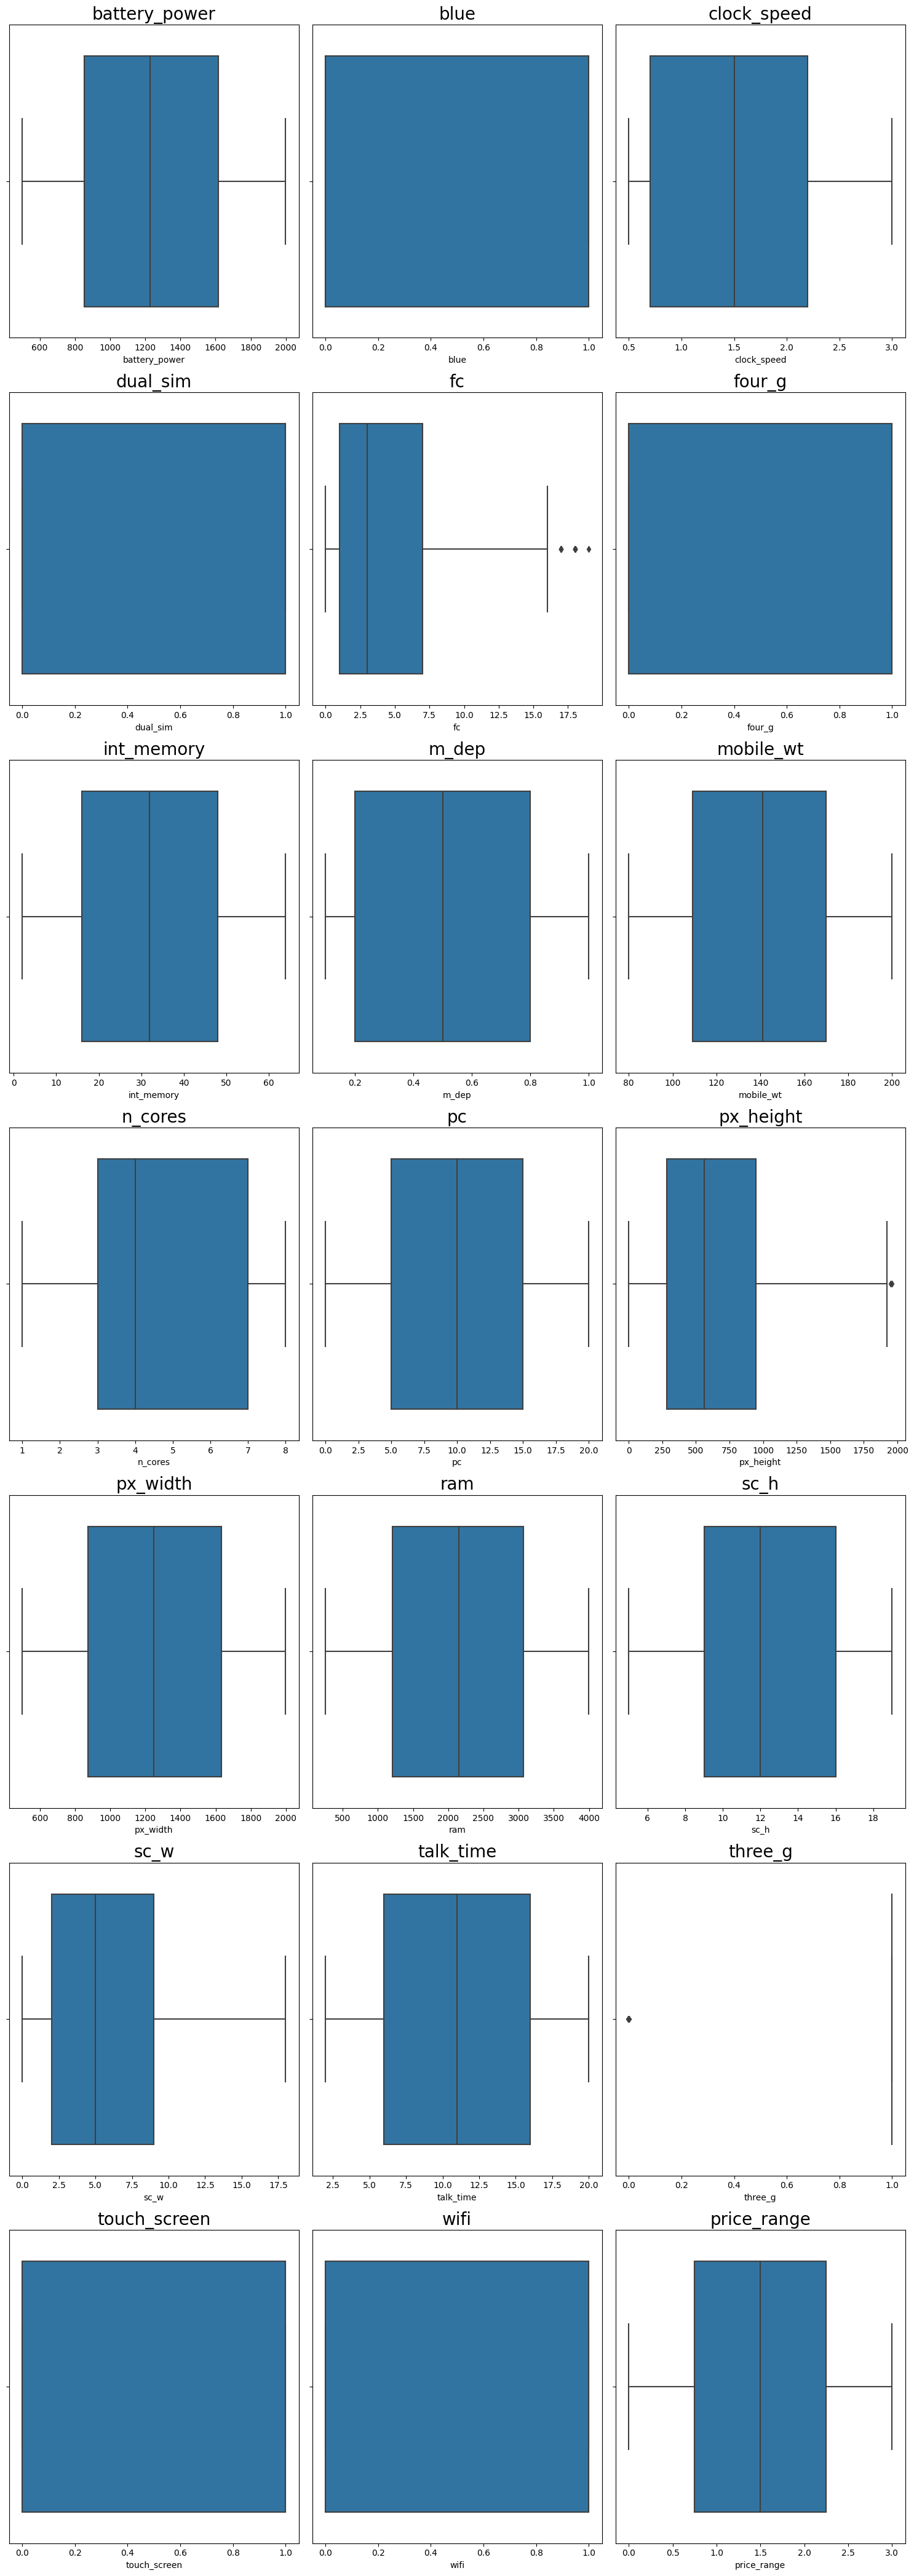

In [151]:
num_rows = (len(df.columns) + 1) // 2

f, ax = plt.subplots(7,3, figsize=(15,2 * len(df.columns)))
ax = ax.flatten()

for index, cols in enumerate(df.columns):
    sns.boxplot(data = df, x= cols, ax = ax[index])
    ax[index].set_title(cols, size = 20)
    
plt.tight_layout()
plt.show()

## **Target Variables Ratio**

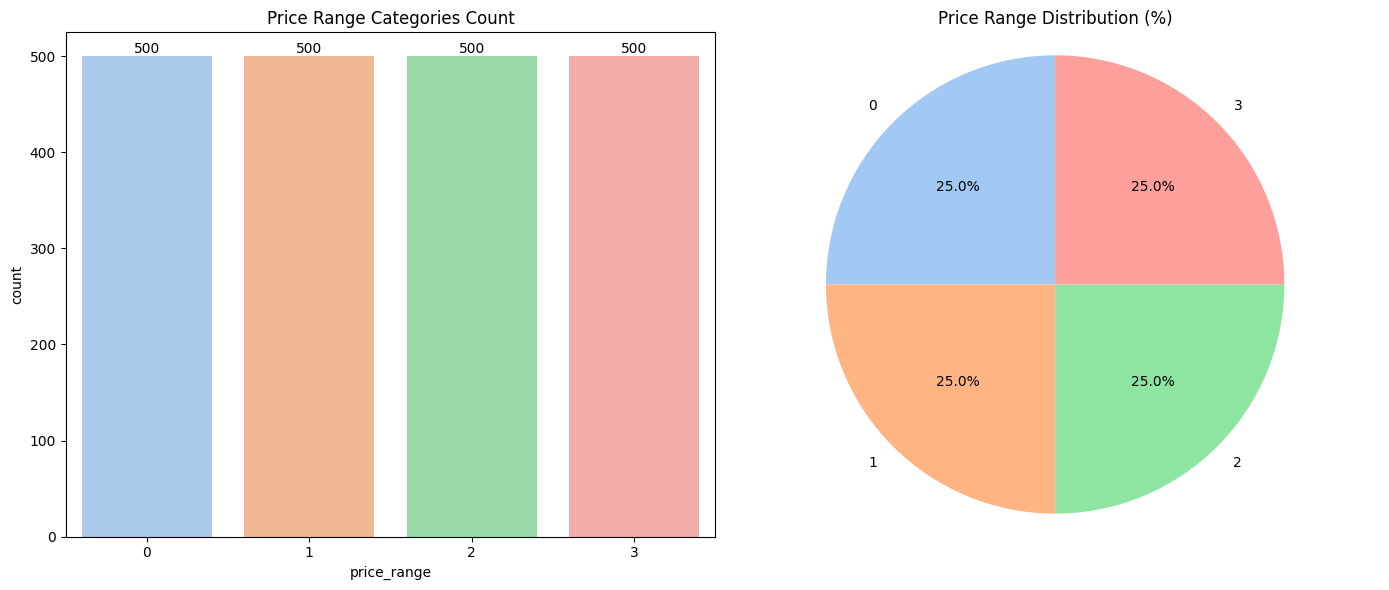

In [152]:
#Count Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax = sns.countplot(data = df, x='price_range', palette='pastel', ax = axes[0] )
axes[0].set_title('Price Range Categories Count')

for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(),                
            f'{count}',                    
            ha='center', va='bottom') 
    
#Pie Plot    
value_counts = df['price_range'].value_counts(normalize=True).sort_index()
percentages = value_counts * 100

axes[1].pie(
    percentages,
    labels=percentages.index,
    autopct='%.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
axes[1].set_title('Price Range Distribution (%)')
axes[1].axis('equal')  

plt.tight_layout()
plt.show()

## **Correlation**

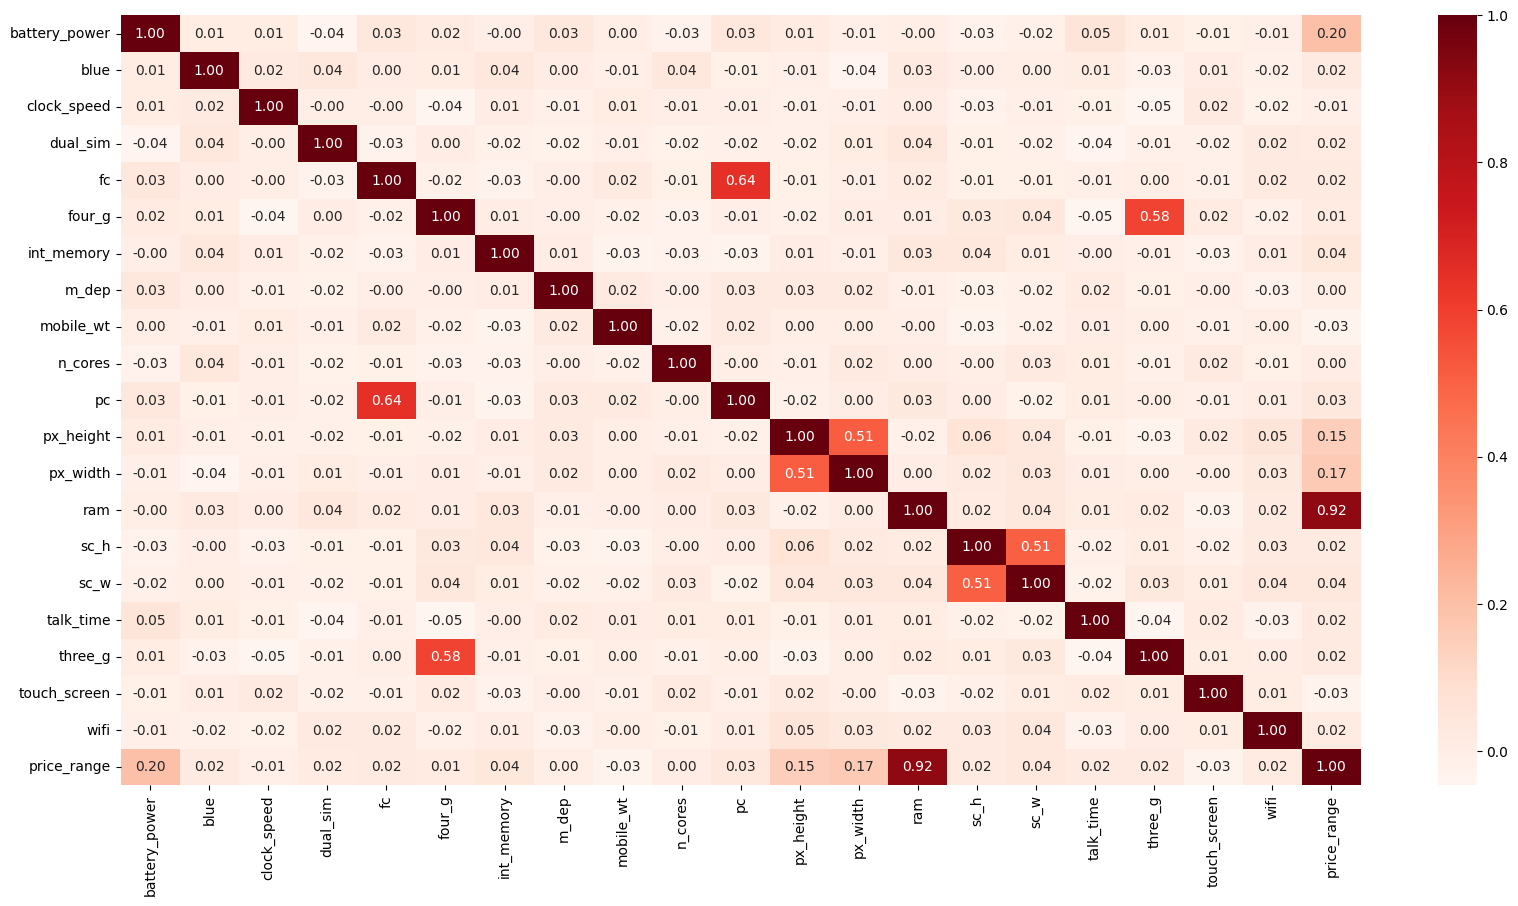

In [153]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

## **4. Modeling**

In [154]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score

## **Train Test Split**

In [155]:
x = df.drop("price_range", axis=1)
y = df["price_range"]

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Standard Scale**

In [157]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [158]:
rfc = RandomForestClassifier(random_state=42)
lgr = LogisticRegression()
dec = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

models = [rfc, lgr,dec, xgb]

names = ["Random Forest", "Logistic Regression","DecisionTree", "XGB"]

Random Forest accuracy: 0.8925
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



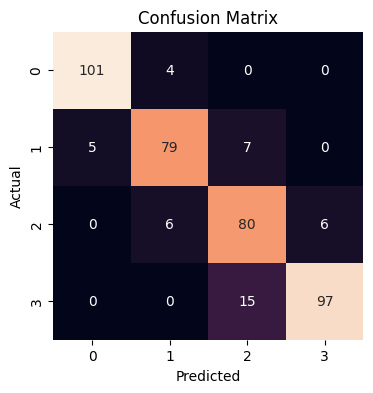

--------------------------------------------------
Logistic Regression accuracy: 0.6325
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.52      0.51      0.51        91
           2       0.48      0.50      0.49        92
           3       0.69      0.73      0.71       112

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.64      0.63      0.63       400



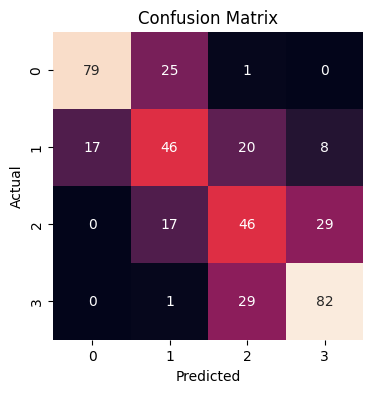

--------------------------------------------------
DecisionTree accuracy: 0.8325
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       105
           1       0.75      0.84      0.79        91
           2       0.80      0.70      0.74        92
           3       0.86      0.90      0.88       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



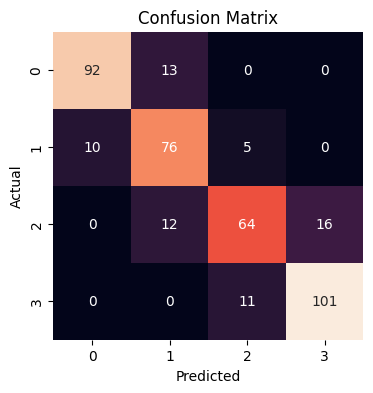

--------------------------------------------------
XGB accuracy: 0.905
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.88      0.93      0.90        91
           2       0.84      0.85      0.84        92
           3       0.93      0.88      0.91       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



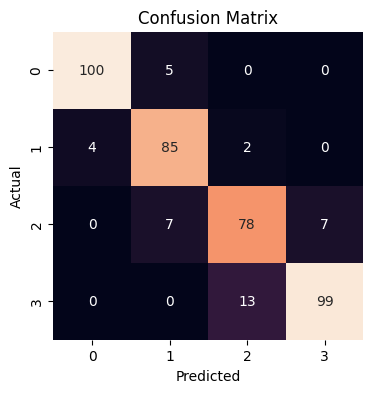

--------------------------------------------------


In [159]:
index = 0
ac = []

for name, model in enumerate(models):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    ac.append(accuracy)
    cm = confusion_matrix(y_test, pred)
    print(f'{names[index]} accuracy: {round(accuracy,4)}')
    print(classification_report(y_test, pred))
 
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("-"*50)
    
    index += 1

## **Model Comparison**

In [160]:
acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})
acc_df['Accuracy'] = acc_df['Accuracy']*100
acc_df

,Model,Accuracy
0,Random Forest,89.25
1,Logistic Regression,63.25
2,DecisionTree,83.25
3,XGB,90.50


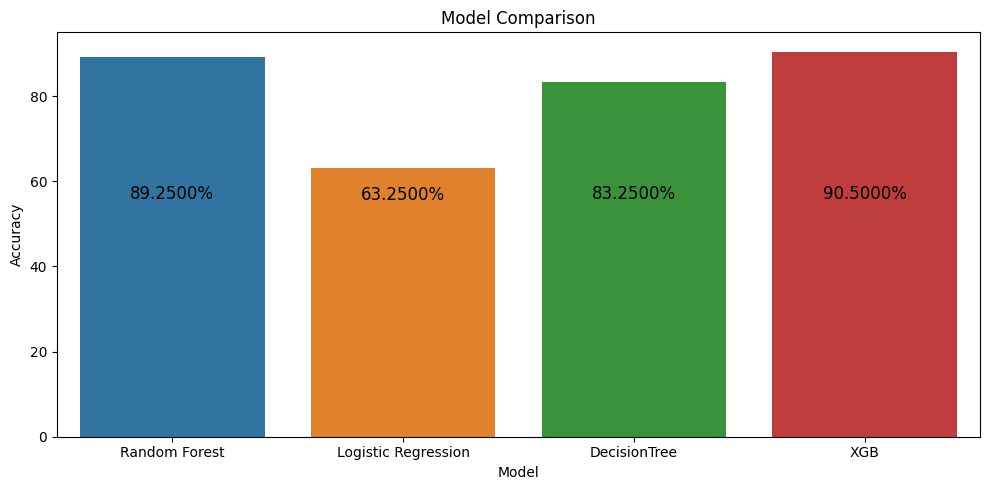

In [161]:
plt.subplots(figsize=(10,5))
sns.barplot(acc_df, x= 'Model', y = 'Accuracy')

for index, value in enumerate(ac):
    plt.text(index, value + 55, f"{value*100:.4f}%", ha='center', fontsize=12)
plt.title("Model Comparison")
plt.tight_layout()
plt.show()

## **Features Importance**

In [162]:
#Select xgb model

sorted_idx = (-xgb.feature_importances_).argsort()
list_of_tuples = list(zip(x.columns[sorted_idx],
                           xgb.feature_importances_[sorted_idx]))
feat_importance = pd.DataFrame(list_of_tuples,
                  columns=['feature','feature importance'])
feat_importance

,feature,feature importance
0,ram,0.417983
1,battery_power,0.137656
2,px_height,0.096421
3,px_width,0.076508
4,m_dep,0.037081
5,mobile_wt,0.028587
6,n_cores,0.022861
7,int_memory,0.020672
8,clock_speed,0.019749
9,talk_time,0.017872


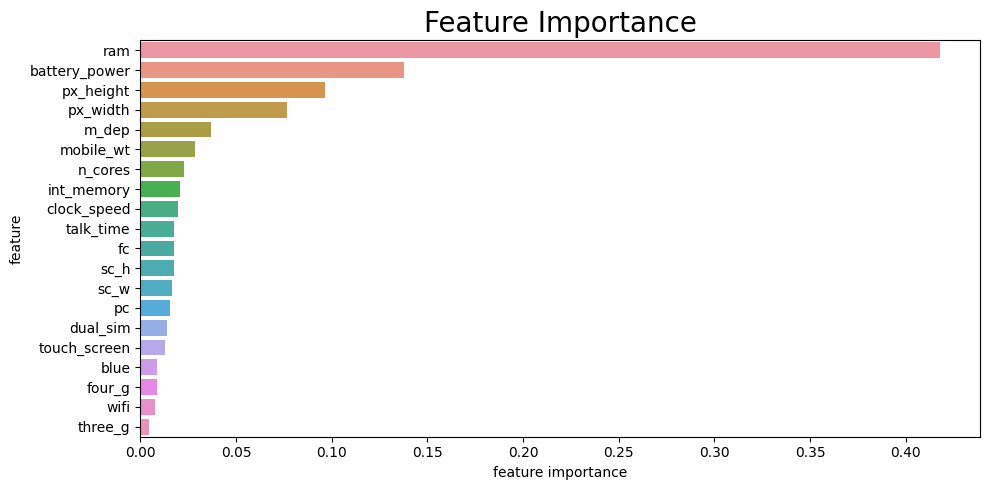

In [163]:
plt.figure(figsize=(10,5))
sns.barplot(feat_importance,y= 'feature',x='feature importance')

plt.title('Feature Importance',fontsize=20)
plt.tight_layout()
plt.show()

## **Tune**

In [164]:
#Select XGB

n_estimators = [100, 200, 300, 400]
max_depth = [None, 10, 20, 30]
learning_rate = [0.01,0.015,0.02]
min_child_weight = [1,2,3]

parameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight
}

In [165]:
grid_cv = GridSearchCV(estimator=xgb,
                               param_grid  = parameter_grid,
                               cv=5,
                               scoring='accuracy',  
                               n_jobs=-1,
                               verbose=5,
                               return_train_score=True
                      )

In [166]:
grid_cv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END learning_rate=0.01, max_depth=None, min_child_weight=1, n_estimators=100;, score=(train=0.969, test=0.856) total time=   0.9s
[CV 5/5] END learning_rate=0.01, max_depth=None, min_child_weight=1, n_estimators=100;, score=(train=0.973, test=0.869) total time=   1.0s
[CV 4/5] END learning_rate=0.01, max_depth=None, min_child_weight=1, n_estimators=200;, score=(train=0.989, test=0.887) total time=   1.7s
[CV 3/5] END learning_rate=0.01, max_depth=None, min_child_weight=1, n_estimators=300;, score=(train=0.995, test=0.875) total time=   2.4s
[CV 2/5] END learning_rate=0.01, max_depth=None, min_child_weight=1, n_estimators=400;, score=(train=0.997, test=0.906) total time=   3.3s
[CV 1/5] END learning_rate=0.01, max_depth=None, min_child_weight=2, n_estimators=100;, score=(train=0.957, test=0.866) total time=   0.8s
[CV 3/5] END learning_rate=0.01, max_depth=None, min_child_weight=2, n_estimators=100;, score=(train=0.

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.015, 0.02],
                         'max_depth': [None, 10, 20, 30],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True, scoring='accuracy', verbose=5)


[CV 3/5] END learning_rate=0.02, max_depth=None, min_child_weight=1, n_estimators=300;, score=(train=0.999, test=0.878) total time=   2.2s
[CV 2/5] END learning_rate=0.02, max_depth=None, min_child_weight=1, n_estimators=400;, score=(train=1.000, test=0.906) total time=   2.8s
[CV 1/5] END learning_rate=0.02, max_depth=None, min_child_weight=2, n_estimators=100;, score=(train=0.973, test=0.872) total time=   0.8s
[CV 3/5] END learning_rate=0.02, max_depth=None, min_child_weight=2, n_estimators=100;, score=(train=0.979, test=0.875) total time=   0.8s
[CV 1/5] END learning_rate=0.02, max_depth=None, min_child_weight=2, n_estimators=200;, score=(train=0.992, test=0.887) total time=   1.4s
[CV 5/5] END learning_rate=0.02, max_depth=None, min_child_weight=2, n_estimators=200;, score=(train=0.997, test=0.891) total time=   1.4s
[CV 4/5] END learning_rate=0.02, max_depth=None, min_child_weight=2, n_estimators=300;, score=(train=1.000, test=0.906) total time=   1.9s
[CV 3/5] END learning_rate

In [167]:
best_params = grid_cv.best_params_
best_score = grid_cv.best_score_
print(f'Best parameters: {best_params}')
print(f'Best score: {best_score}')

Best parameters: {'learning_rate': 0.02, 'max_depth': None, 'min_child_weight': 2, 'n_estimators': 400}
Best score: 0.9056249999999999


In [169]:
best_model_xgb = grid_cv.best_estimator_
pred_xgb2 = best_model_xgb.predict(x_test_scaled)

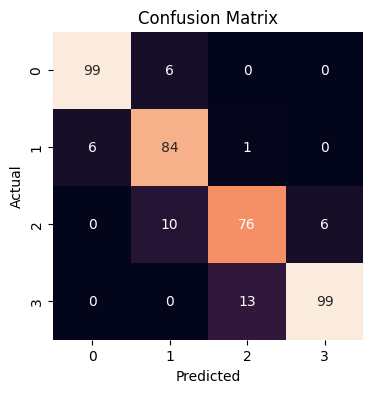

In [170]:
accuracy2 = accuracy_score(y_test, pred_xgb2)
cm2 = confusion_matrix(y_test, pred_xgb2)
plt.figure(figsize=(4, 4))
sns.heatmap(cm2, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [171]:
model_xgb_report = classification_report(y_test, pred_xgb2)
print(f'XGB Model accuracy: {round(accuracy2,4)}')
print('Classification Report:')
print(f'{model_xgb_report}')

XGB Model accuracy: 0.895
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       105
           1       0.84      0.92      0.88        91
           2       0.84      0.83      0.84        92
           3       0.94      0.88      0.91       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400

